In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import random
import matplotlib.pyplot as plt
from scipy import stats

import json
from datetime import timedelta, date, datetime
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
path = os.getcwd() + '/mfp-diaries.tsv'
data = pd.read_csv(path, sep='\t')
data.head()

,1,2014-09-14,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"": [{""name"": ""Calories"", ""value"": ""412""}, {""name"": ""Carbs"", ""value"": ""29""}, {""name"": ""Fat"", ""value"": ""24""}, {""name"": ""Protein"", ""value"": ""21""}, {""name"": ""Sodium"", ""value"": ""258""}, {""name"": ""Sugar"", ""value"": ""29""}], ""name"": ""my - McDonalds Espresso Pronto\u00ae Flat White, 2 TALL""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""170""}, {""name"": ""Carbs"", ""value"": ""25""}, {""name"": ""Fat"", ""value"": ""5""}, {""name"": ""Protein"", ""value"": ""20""}, {""name"": ""Sodium"", ""value"": ""260""}, {""name"": ""Sugar"", ""value"": ""2""}], ""name"": ""Quest Bar - Banana Nut Muffin Natural Protein Bar, 60 g""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""176""}, {""name"": ""Carbs"", ""value"": ""33""}, {""name"": ""Fat"", ""value"": ""1""}, {""name"": ""Protein"", ""value"": ""5""}, {""name"": ""Sodium"", ""value"": ""195""}, {""name"": ""Sugar"", ""value"": ""0""}], ""name"": ""Uncle Tobys Australia - Vita Brits, 3 Biscuits 33.3g""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""342""}, {""name"": ""Carbs"", ""value"": ""34""}, {""name"": ""Fat"", ""value"": ""12""}, {""name"": ""Protein"", ""value"": ""24""}, {""name"": ""Sodium"", ""value"": ""402""}, {""name"": ""Sugar"", ""value"": ""34""}], ""name"": ""Pauls - Smarter White Milk, 600 ml""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""180""}, {""name"": ""Carbs"", ""value"": ""22""}, {""name"": ""Fat"", ""value"": ""7""}, {""name"": ""Protein"", ""value"": ""21""}, {""name"": ""Sodium"", ""value"": ""310""}, {""name"": ""Sugar"", ""value"": ""1""}], ""name"": ""Quest Bar - Cookies and Cream, 1 bar""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""180""}, {""name"": ""Carbs"", ""value"": ""46""}, {""name"": ""Fat"", ""value"": ""0""}, {""name"": ""Protein"", ""value"": ""0""}, {""name"": ""Sodium"", ""value"": ""100""}, {""name"": ""Sugar"", ""value"": ""22""}], ""name"": ""Gu Sports - Chomps, 8 pieces""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""170""}, {""name"": ""Carbs"", ""value"": ""25""}, {""name"": ""Fat"", ""value"": ""5""}, {""name"": ""Protein"", ""value"": ""20""}, {""name"": ""Sodium"", ""value"": ""260""}, {""name"": ""Sugar"", ""value"": ""2""}], ""name"": ""Quest Bar - Banana Nut Muffin Natural Protein Bar, 60 g""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""160""}, {""name"": ""Carbs"", ""value"": ""25""}, {""name"": ""Fat"", ""value"": ""5""}, {""name"": ""Protein"", ""value"": ""20""}, {""name"": ""Sodium"", ""value"": ""240""}, {""name"": ""Sugar"", ""value"": ""2""}], ""name"": ""Quest - Protein Bar Chocolate Peanut Butter, 1 bar (60 g)""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""686""}, {""name"": ""Carbs"", ""value"": ""59""}, {""name"": ""Fat"", ""value"": ""31""}, {""name"": ""Protein"", ""value"": ""40""}, {""name"": ""Sodium"", ""value"": ""1,105""}, {""name"": ""Sugar"", ""value"": ""9""}], ""name"": ""Grilld - Simply Grilled (Real), 1.25 burger""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""252""}, {""name"": ""Carbs"", ""value"": ""27""}, {""name"": ""Fat"", ""value"": ""14""}, {""name"": ""Protein"", ""value"": ""5""}, {""name"": ""Sodium"", ""value"": ""352""}, {""name"": ""Sugar"", ""value"": ""1""}], ""name"": ""Grilld - Snack Chips, 1 snack size""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""196""}, {""name"": ""Carbs"", ""value"": ""15""}, {""name"": ""Fat"", ""value"": ""10""}, {""name"": ""Protein"", ""value"": ""10""}, {""name"": ""Sodium"", ""value"": ""176""}, {""name"": ""Sugar"", ""value"": ""7""}], ""name"": ""Tasti - Salted Caramel Protein Bar, 40 g""}], ""sequence"": 1}]","{""total"": [{""name"": ""Calories"", ""value"": 2924}, {""name"": ""Carbs"", ""value"": 340}, {""name"": ""Fat"", ""value"": 114}, {""name"": ""Protein"", ""value"": 186}, {""name"": ""Sodium"", ""value"": 3658}, {""n

## აქ დავწეერთ დატის პატარა აღწერას და მივაწერთ ამ სიმახინჯეს როგორ გადავაჩვენგემოვნებთ

შევხედოთ რა რეინჯში არის ჩვენი მონაცემები რადგან ზედა "output"-ით ვხედავთ რომ 14 სექტემბერია 2014 წლის

In [4]:
print("First Date: ", data[data.columns[1]].unique().min())
print("Last Date: ",data[data.columns[1]].unique().max())

First Date:  2014-09-14
Last Date:  2015-04-09


შევხედოთ რამდენი განსხვავებული თარიღი გვხვდება

In [5]:
uniques = data[data.columns[1]].unique()
print("unique dates: ", len(uniques))

unique dates:  208


In [6]:
tmp_data = []

start = datetime.strptime('2014-09-14','%Y-%m-%d').date()
end = datetime.strptime('2015-04-09','%Y-%m-%d').date()
difference = int((end-start).days)+1

for i in range(difference):
    dat = start+timedelta(i)
    dat_str = dat.strftime('%Y-%m-%d')
    curr_dt = data[data[data.columns[1]]==dat_str]
    tmp_data.append(curr_dt.shape[0])

Text(0.5, 1.0, 'Frequency In A Single Day')

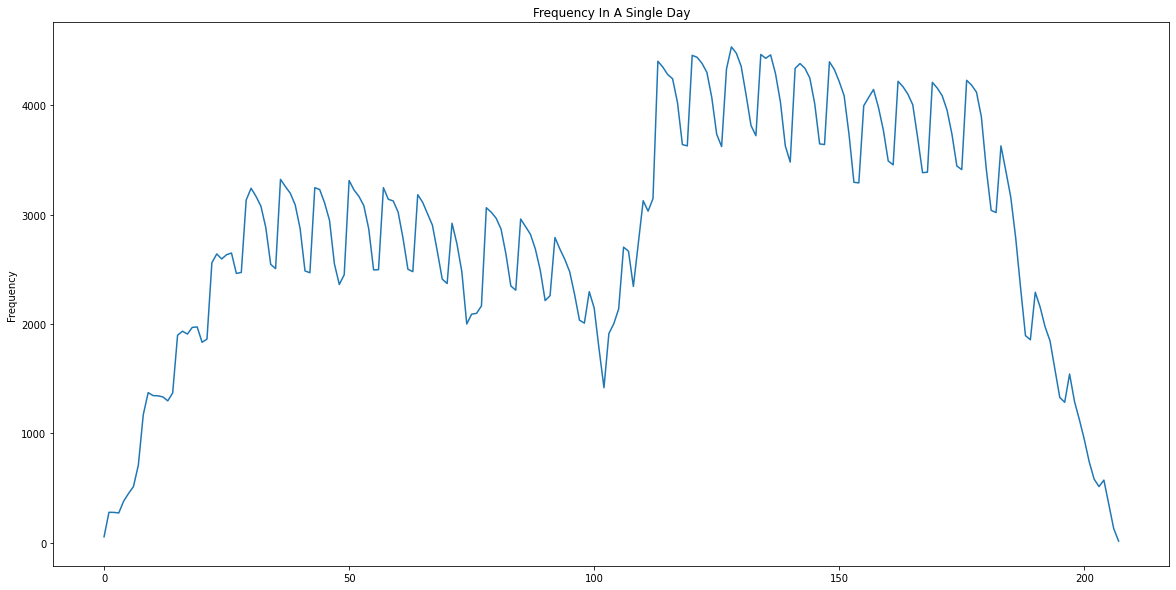

In [7]:
plt.figure(figsize=(20,10))
plt.plot(tmp_data)
plt.ylabel('Frequency')
plt.title('Frequency In A Single Day')

აქაც რაღაც დასკვნას გამოვიტანთ რომ თავიდან უფრო ხოდზე იყო ხალხი

In [8]:
user_archive = np.zeros(data[data.columns[0]].unique().max())
for i in range(difference):
    dat = start+timedelta(i)
    dat_str = dat.strftime('%Y-%m-%d')
    curr_dt = data[data[data.columns[1]]==dat_str]
    for j in range(curr_dt.shape[0]):
        user_archive[curr_dt.iloc[j,0]-1]+=1


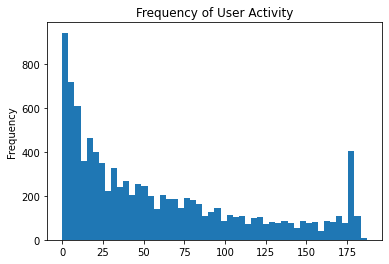

In [9]:
plt.hist(user_archive, bins=50)
plt.ylabel('Frequency')
plt.title('Frequency of User Activity')
plt.show()

სულ ზევით რომ დავბეჭდეთ იქ ვხედავთ რომ გვაქვს dishes(კრებითი სახელია და დღის განმავლობაში ყველა ჭამას გლისხმობს), რომლებსაც აქვთ name და რომლებიც ნიშნავს საუზმე სადილი და ა.შ ეგეთებს

In [10]:
unique_nutritions = {}
for i in range(data.shape[0]):
    foods = json.loads(data.iloc[i,2])
    for j in range(len(foods)):
        dishes = foods[j]['dishes']
        
        for curr_dish in range(len(dishes)):
            nutritions = dishes[curr_dish]['nutritions']
            
            for n in range(len(nutritions)):
                prto_type = nutritions[n]['name']
                if prto_type in unique_nutritions.keys():
                    unique_nutritions[prto_type]+=1
                else:
                    unique_nutritions[prto_type] = 1
                

In [11]:
sortedNutritions = sorted(unique_nutritions.items(), key=lambda x : x[1], reverse = True)
print(sortedNutritions)

[('Calories', 6502736), ('Protein', 6428935), ('Carbs', 6332306), ('Fat', 6300927), ('Sodium', 4226233), ('Sugar', 3933313), ('Fiber', 2859976), ('Iron', 367846), ('Calcium', 280697), ('Potass.', 245784), ('Chol', 198545), ('Sat Fat', 190156), ('Vit C', 24166), ('Trn Fat', 16932), ('Ply Fat', 14614), ('Mon Fat', 11282), ('Vit A', 9165)]


# es tipi gadavaqciot dictionarad

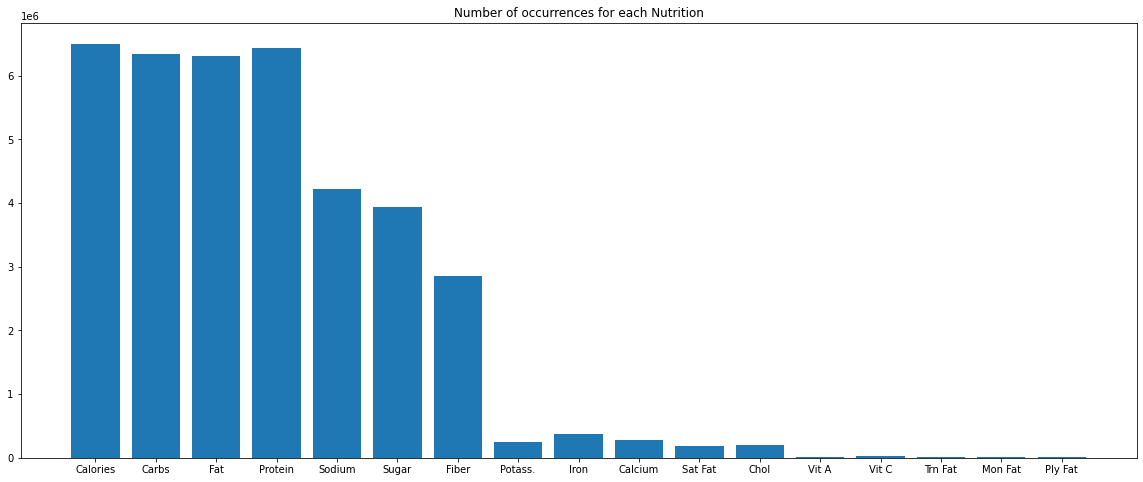

In [12]:
plt.figure(figsize=(20,8))
plt.bar(x = unique_nutritions.keys(), height = unique_nutritions.values())
plt.title('Number of occurrences for each Nutrition')
plt.show()

# აქ უკვე ლამაზად რომ იყოს დახატული ბოლო 5 ტიპს ვიკიდებთ და ამოვყრით sortedNutritions-დან

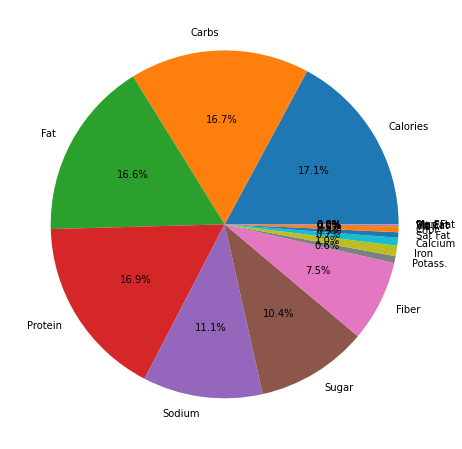

In [13]:
plt.figure(figsize=(20,8))
plt.pie(unique_nutritions.values(), labels = unique_nutritions.keys(),autopct = "%1.1f%%")
plt.show()

რამდენი უნიკალური მახასიათებელი აქვს საჭმელს, მაგ: კალორია, ცხიმის შემცველობა, პროტეინის, შაქრის და ა.შ.

In [14]:
len(unique_nutritions.keys())

17

დავთვალოთ საჭმელების უნიკალური მახასიათებლები 2 პარამეტრად, 
1.მომხმარებელს რამდენი აქვს შეყვანილი(რამდენი ჭამა)


2.მიზანი (აპლიკაციამ რამდენი დაუნიშნა)


# აქ ახსნილი გვეექნება ბოლო 5-ს რატომ ვაგდებთ ჩვენი ამოცანიდან გამომდინარე


In [15]:
prot_names = ['Calories', 'Carbs', 'Fat', 'Protein', 
         'Sodium', 'Sugar', 'Fiber', 'Potass.', 
         'Iron', 'Calcium', 'Sat Fat', 'Chol']

not_needed_prots = ['Vit A', 'Vit C', 'Trn Fat', 
                    'Mon Fat', 'Ply Fat']

ტოტალები

In [16]:
total_calories = []
total_carbs = []
total_fat = []
total_protein = []
total_sodium = []
total_sugar = []
total_fiber = []
total_potass = []
total_iron = []
total_calcium = []
total_sat_fat = []
total_chol = []

totals = [total_calories,total_carbs,total_fat,total_protein,
          total_sodium, total_sugar,total_fiber,total_potass,
          total_iron, total_calcium, total_sat_fat,total_chol]

In [17]:
def count_totals(tot_data):
    result = {}

    for curr_tot in tot_data:
        prot_name = curr_tot['name']
        if prot_name in not_needed_prots:
            continue
        prot_val = curr_tot['value']
        if prot_name not in result.keys():
            result[prot_name] = prot_val
        else: 
            result[prot_name] += prot_val
        
        totals[prot_names.index(prot_name)].append(prot_val)
        
    return result

მიზნები

In [18]:
goal_calories = []
goal_carbs = []
goal_fat = []
goal_protein = []
goal_sodium = []
goal_sugar = []
goal_fiber = []
goal_potass = []
goal_iron = []
goal_calcium = []
goal_sat_fat = []
goal_chol = []

goals = [goal_calories,goal_carbs,goal_fat,goal_protein,
         goal_sodium,goal_sugar,goal_fiber,goal_potass,
         goal_iron, goal_calcium, goal_sat_fat,goal_chol]

In [19]:
def fill_goals(goal_data):
    for curr_goal in goal_data:
        prot_name = curr_goal['name']
        if prot_name in not_needed_prots:
            continue
        prot_value = curr_goal['value']
        goals[prot_names.index(prot_name)].append(prot_value)

### ამათი დანიშნულებაც აღვწეროთ რომ გავერკვევით

In [20]:
divergence = []
dishes_count = []

In [21]:
def replacer(value):
    return value.replace(',', '')

In [22]:
def count_sums():
    result = {}
    
    dishes = json.loads(data.iloc[i,2])
    
    for dish in dishes:
        dish_per_day = dish['dishes']
        dishes_count.append(len(dish_per_day))
        
        for food in dish_per_day:
            nutritions = food['nutritions']
            
            for prot in nutritions:
                prot_name = prot['name']
                if prot_name in not_needed_prots:
                    continue
                prot_val = prot['value']
                if prot_name not in result.keys():
                    result[prot_name] = int(replacer(prot_val))
                else:
                    result[prot_name] += int(replacer(prot_val))
    
    return result

In [25]:
def checkForDivergence(tots, index):
    sums = count_sums()
    if tots != sums:
        divergence.append((index, sums, tots))

In [26]:
sum_check = True
gt_check = False
for i in range(data.shape[0]):
    sums = count_sums()

    main_info = json.loads(data.iloc[i,3])

    total_data = main_info['total']     
    goal_data = main_info['goal']
    fill_goals(goal_data)
    
    checkForDivergence(count_totals(total_data), i)


## aq vbazrobt rom sainteresoa ra xdebaaa


In [30]:
for index in range(20):
    print(divergence[index])

(33612, {'Calories': 3960}, {'Calories': 1980})
(33613, {'Calories': 682}, {'Calories': 341})
(33614, {'Calories': 5030}, {'Calories': 2515})
(33615, {'Calories': 4190}, {'Calories': 2095})
(33616, {'Calories': 4462}, {'Calories': 2231})
(33617, {'Calories': 190}, {'Calories': 95})
(33618, {'Calories': 304}, {'Calories': 152})
(33619, {'Calories': 2506}, {'Calories': 1253})
(33620, {'Calories': 3400}, {'Calories': 1700})
(33621, {'Calories': 2856}, {'Calories': 1428})
(33622, {'Calories': 1394}, {'Calories': 697})
(33623, {'Calories': 3152}, {'Calories': 1576})
(33624, {'Calories': 1116}, {'Calories': 558})
(33625, {'Calories': 2432}, {'Calories': 1216})
(33626, {'Calories': 2230}, {'Calories': 1115})
(33627, {'Calories': 2580}, {'Calories': 1290})
(33628, {'Calories': 2146}, {'Calories': 1073})
(33629, {'Calories': 4048}, {'Calories': 2024})
(33630, {'Calories': 2180}, {'Calories': 1090})
(33631, {'Calories': 1192}, {'Calories': 596})
